# Plot Figure 2 (FDR curves) for the paper

**TODO: Rerun this once `1-call.sh` and `2-fdr-estimate.sh` are done running,** so we can use the exact outputs produced by those scripts.

In [10]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot, patches
pyplot.style.use("ggplot")

## Load computed FDR estimate and (number of mutations per megabase) information

In [2]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

# TODO update to point to sf-analyses/sheep/output/ location
output_dir = "/Poppy/mfedarko/sftests/tutorial-output/p15-fdr-info"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir(output_dir):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print(f"All {len(ctx2fdr):,} decoy context(s) we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All 11 decoy context(s) we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
edge_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10090,53.431465,44.408169,35.816020,31.381362,26.823519,23.251156,19.801978,17.954204,15.398117,13.673528,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
edge_1016,229.105623,190.415163,153.573395,134.558288,115.014984,99.697260,84.907732,76.984771,66.024675,58.629912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10177,21.377475,17.767331,14.329685,12.555416,10.731862,9.302590,7.922603,7.183324,6.160656,5.470662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
numpermbs.head()

,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
edge_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
edge_1001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
edge_10090,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,8223.756716,...,144.11779,144.11779,16.389866,16.389866,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
edge_1016,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,1917.924859,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
edge_10177,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,20554.690181,...,40.26190,34.32162,31.021464,25.081184,24.421153,20.460966,17.16081,13.200623,9.240436,3.300156


## Load diversity index information and select high-diversity-index contigs

We'll show a grid of FDR curves of various high-diversity-index MAGs at the top of the figure, just to underscore the point that these sorts of curves can be drawn for arbitrary MAGs, and look somewhat similar for high-diversity-index MAGs.

We computed multiple columns of diversity indices (using different values of $p$) when running `strainFlye call`. How do we choose which diversity index to use to select high-diversity index contigs? The choice is arbitrary -- ideally, we want to minimize $p$ (or $r$), while making sure that there are still a reasonable number of contigs with this diversity index defined.

In [4]:
di = pd.read_csv(
    "/Poppy/mfedarko/sftests/tutorial-output/call-p15/diversity-indices.tsv", sep="\t", index_col=0
)
long_di = di[di["Length"] >= 1000000]
long_di_sorted = long_di.sort_values(["DivIdx(p=50,minSuffCov=1000.0)"], ascending=False)
long_di_sorted.head(10)

,AverageCoverage,Length,"DivIdx(p=50,minSuffCov=1000.0)","DivIdx(p=100,minSuffCov=500.0)","DivIdx(p=200,minSuffCov=250.0)","DivIdx(p=500,minSuffCov=100.0)","DivIdx(p=1000,minSuffCov=50.0)","DivIdx(p=2500,minSuffCov=20.0)","DivIdx(p=5000,minSuffCov=10.0)"
Contig,,,,,,,,,
edge_3030,1035.740707,1915304,0.041088,0.033952,0.031322,0.025060,0.017557,4.156003e-04,1.566332e-06
edge_3402,877.282137,3713351,0.024924,0.018800,0.012130,0.002100,0.000195,1.008768e-04,2.706565e-07
edge_7356,742.905564,1602179,0.024833,0.021453,0.017328,0.006580,0.001584,2.563919e-04,0.000000e+00
edge_7354,1119.104000,1036318,0.023789,0.018875,0.015372,0.009458,0.005996,1.543928e-05,0.000000e+00
edge_7349,1325.510426,1175877,0.012973,0.010487,0.008060,0.003285,0.001409,3.500673e-04,1.713526e-06
edge_1671,1415.072755,2153394,0.011340,0.010501,0.008338,0.003400,0.000240,4.679987e-07,0.000000e+00
edge_23917,1987.798829,1020213,0.009018,0.003313,0.000775,0.000467,0.000306,0.000000e+00,0.000000e+00
edge_11863,1057.411793,2597011,0.001933,0.000818,0.000670,0.000345,0.000208,1.136314e-04,3.898408e-07
edge_4773,1176.249727,1371455,0.001268,0.000947,0.000865,0.000841,0.000556,0.000000e+00,0.000000e+00


## Plot FDR curves

### Various settings

In [37]:
# rainbow colorscheme - inspired by Elias/Gygi '07, Fig. 2a & 2b (and also homestuck lol)
#
# Note that we have 10 colors, not 11, since we will not be plotting the "CP2Nonsyn" context (see
# below for details)
rainbow = [
    "#713F16", "#D40000", "#D47400", "#D4CE00", "#2F8C04",
    "#00BBC3", "#0079CC", "#0022CC", "#790096", "#CC007C"
]

# go o+solid, o+dashed, o+dotted, o+dashdot, D+solid, ...
# this way of varying linestyles and markers means that even if the reader cannot perceive
# differences in color they should still be able to unambiguously figure out which line is which
# see https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyles = ["solid", (0,(5,1)), (0, (1,1)), "dashdot"] * 3
markers = (["o"] * 4) + (["D"] * 4) + (["*"] * 2)

# Draw a line indicating "wow we can fix the estimated FDR here"
fdr_fix_pct = 1
fdr_fix_color = "#333"

# What contigs are we going to plot?
small_plot_contigs = list(long_di_sorted.index[:8])
BIG_CONTIG = "edge_1671"
assert BIG_CONTIG in small_plot_contigs

# What contexts are we going to plot, and what colors do we want to use?
# Let's order them up here, so that we can consistently map them to a color + style.
#
# Also, we order them using the lowest value of p's estimated FDR for BACT1 -- this way, the big
# plot has a nice rainbow effect, and the small plots can use the exact same colors.
ctxs = sorted(ctx2fdr.keys(), key=lambda ctx: ctx2fdr[ctx]["p15"][BIG_CONTIG])

# don't plot CP2Nonsyn because it is REALLY difficult to distinguish visually from CP2
# (I've kept "CP2 + Nonsynonymous" as an option because it is technically slightly different
# from just CP2 -- this is because there is one synonymous single-nucleotide CP2 mutation,
# TGA (stop) <---> TAA (stop).)
ctxs.remove("CP2Nonsyn")

# Keep it simple for the small plots, which don't have a ton of space
ctx_to_plot_small = ["Full", "CP2", "Tv", "Nonsense"]

# Map context names to colors, linestyles, and markers
ctx2color = {}
ctx2linesty = {}
ctx2marker = {}
for ci, ctx in enumerate(ctxs):
    ctx2color[ctx] = rainbow[ci]
    ctx2linesty[ctx] = linestyles[ci]
    ctx2marker[ctx] = markers[ci]
    
pvals = [int(pstr[1:]) for pstr in numpermbs.columns]
min_p = min(pvals)
max_p = max(pvals)

special_p_kwargs = {"color": "#333", "fontsize": 17, "fontweight": "semibold"}

### Utility function(s)

In [38]:
def plot_fdr_curves(contig, ctx_to_plot, ax, lw=3, markersize=5, xlim_min=-0.3):
    xlim_max = 100
    for ctx in ctx_to_plot:
        x = []
        y = []
        best_p = None
        
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        
        for f, n, p in zip(xvals, yvals, pvals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)
                
                errtext = f"for ctx {ctx} for contig {contig}"
                # this case can be handled, of course, but it's nice to know when things get high
                # *don't* need to clamp
                if f >= xlim_max:
                    print(f"FYI we found an est FDR = {f}% >= {xlim_max}% {errtext}")
                    xlim_max = f + 20
                    
                # should never happen
                if f < 0:
                    raise ValueError(f"Found an est FDR = {f}% < 0% {errtext} (what????)")
                    
                if f <= fdr_fix_pct:
                    # we're iterating through these in ascending order, so i guess we could
                    # just break once we see a "passing" value of p. but let's idiotproof this
                    # in case i change the order later lol
                    if best_p is None or p < best_p:
                        best_p = p

        if best_p is not None:
            label = f"{ctx} ($p$ = {best_p/100:.2f}%)"
        else:
            label = f"{ctx} (no rare mutations selectable)"
                        
        # plot the curve itself
        ax.plot(
            x,
            y,
            color=ctx2color[ctx],
            linestyle=ctx2linesty[ctx],
            marker=ctx2marker[ctx],
            lw=lw,
            label=label,
            markersize=markersize
        )
        
    ax.axvline(x=fdr_fix_pct, linestyle="--", color=fdr_fix_color, lw=lw)
    
    ax.set_xscale("symlog")
    ax.xaxis.set_major_formatter("{x:,.0f}")
    ax.yaxis.set_major_formatter("{x:,.0f}")
    ax.set_xlim(xlim_min, xlim_max)
    
    ax.tick_params(axis="y", which="major", labelsize=11)
    ax.tick_params(axis="x", which="major", labelsize=11)
    ax.tick_params(axis="x", which="minor", labelsize=9.5)

### Actually do plotting!

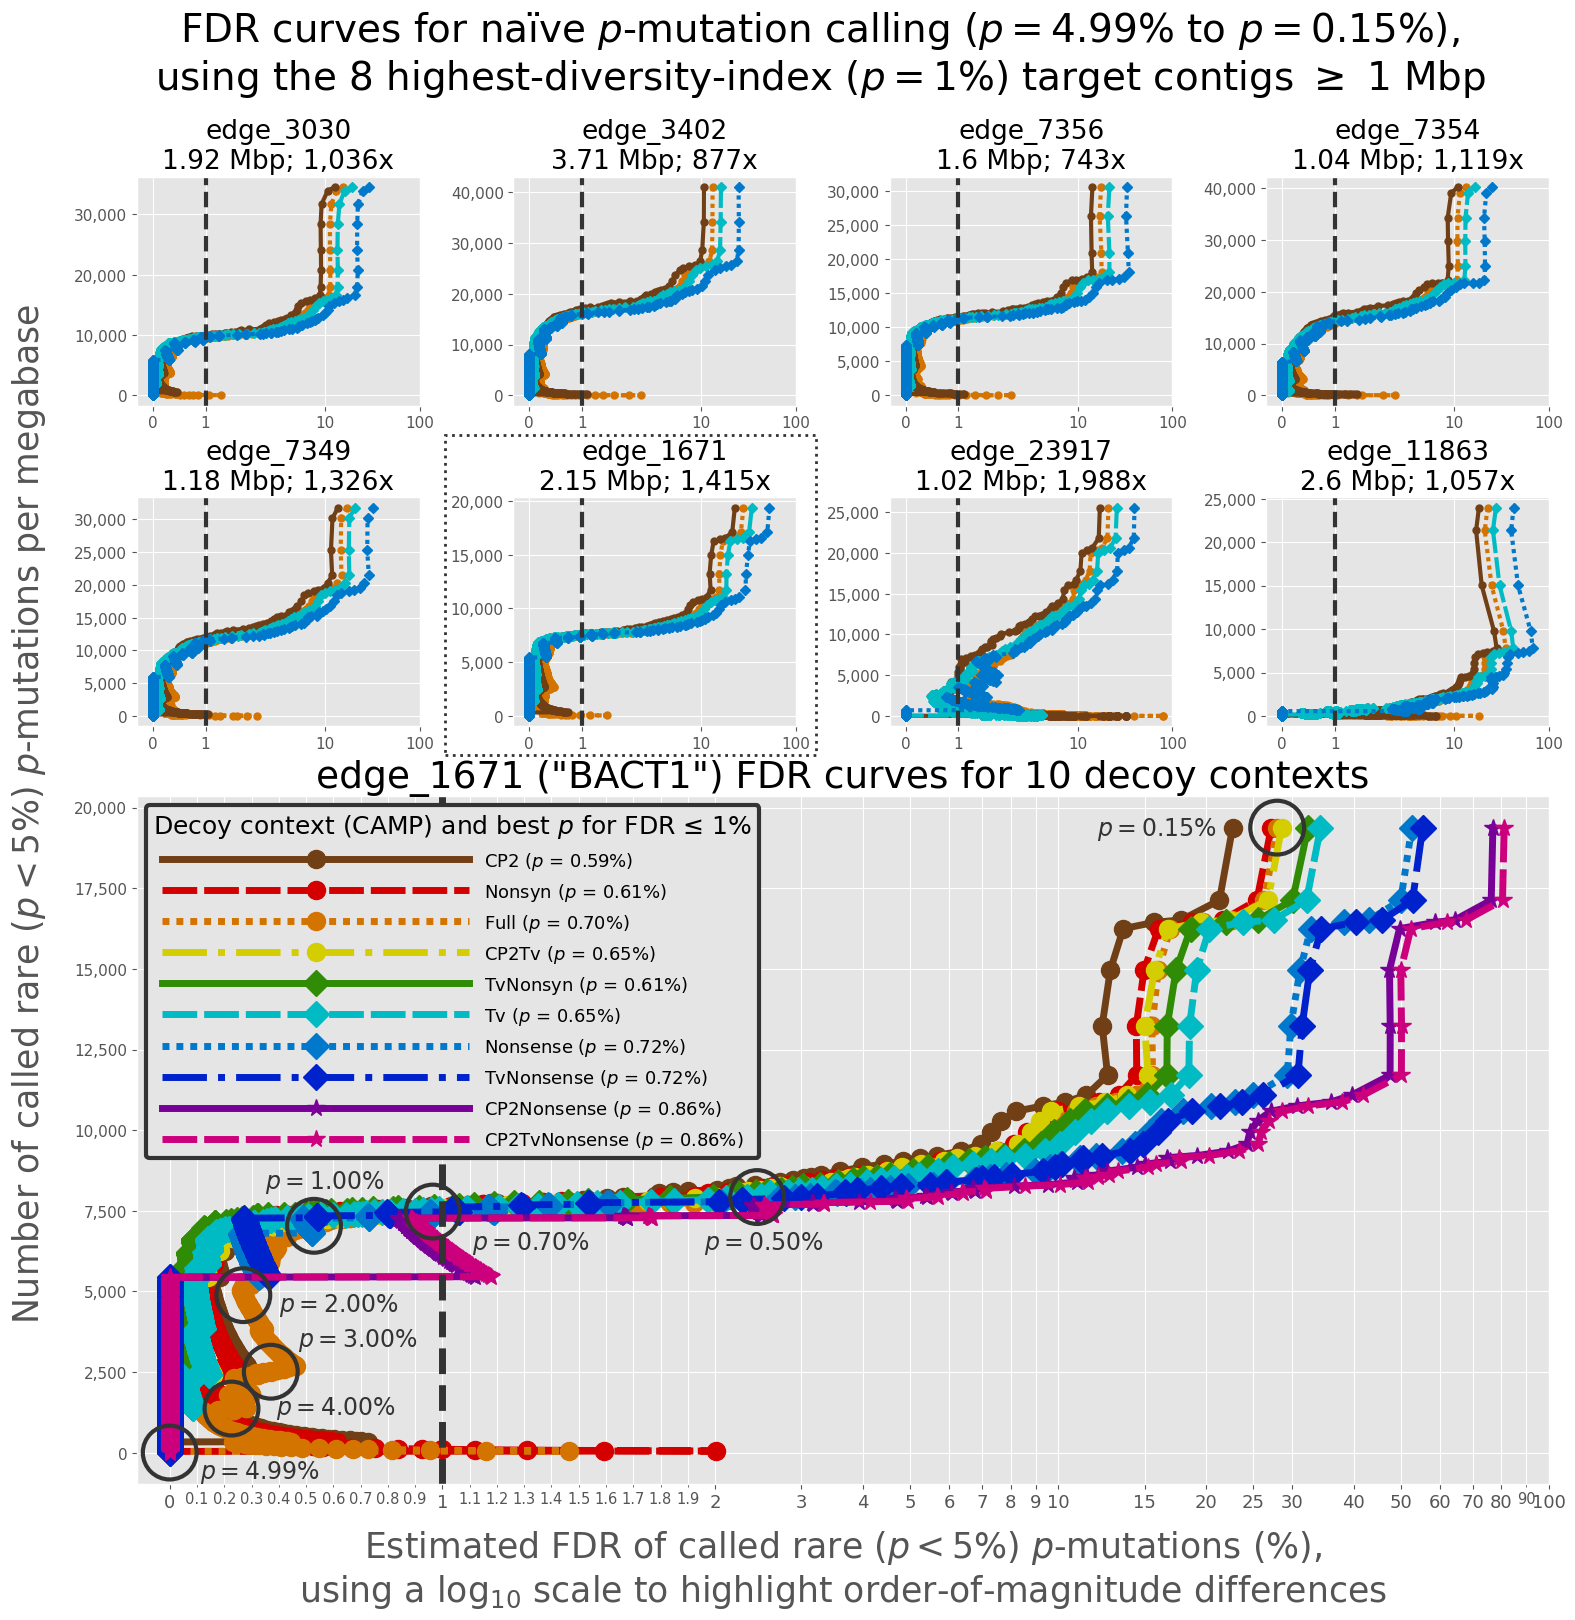

In [42]:
# subplot_mosaic() is a really nice way of making fancy subplots where things span multiple rows/cols;
# see https://stackoverflow.com/a/70004388
#
# The labels 0 through 7 refer to tiny FDR curves; the 8 is the biiig FDR curve for the BIG_CONTIG (aka BACT1)
fig, axes = pyplot.subplot_mosaic(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
    ],
    constrained_layout=True
)

for ci, contig in enumerate(small_plot_contigs):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # This matches the suplot mosaic labels we set above.
    
    # the decoy doesn't have FDR estimates
    assert contig != "edge_6104"
    
    # set up title
    length_info = f"{round(long_di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(long_di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[ci].set_title(title, fontsize=19)
    
    plot_fdr_curves(contig, ctx_to_plot_small, axes[ci])
    
plot_fdr_curves("edge_1671", ctxs, axes[8], lw=5, markersize=13, xlim_min=-0.12)

# fancy x-axis stuff for the bottom plot
# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x > 20 else "{:,}".format(x)
)
axes[8].xaxis.set_major_formatter(ff)
axes[8].xaxis.set_minor_formatter(ff)
axes[8].set_xticks([x / 10 for x in range(1, 20)] + [90], minor=True)
axes[8].set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
axes[8].tick_params(axis="x", which="major", labelsize=13)
axes[8].tick_params(axis="x", which="minor", labelsize=10.5)

# fancy legend for the bottom plot
axes[8].legend(
    handlelength=17,
    fontsize=13,
    title="Decoy context (CAMP) and best $p$ for FDR \u2264 1%",
    title_fontsize=18,
    framealpha=1,
    edgecolor="#333",
).get_frame().set_linewidth(3)

# title for the bottom plot
axes[8].set_title(
    f'edge_1671 ("BACT1") FDR curves for {len(ctxs):,} decoy contexts',
    fontsize=27
)

# the minor ticks don't make vertical gridlines show up by default -- this fixes that
axes[8].grid(which="both", color="white")

# highlight p = 4.99%, p = 4%, p = 3%, p = 2%, p = 1%, p = 0.5%, p = 0.15%
# https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/ReadClustering-DiverseGene.ipynb
yvals = numpermbs.loc[BIG_CONTIG]
sp2xy = {
    15: [12, 19150],
    50: [1.96, 6300],
    70: [1.11, 6300],
    100: [0.35, 8200],
    200: [0.4, 4400],
    300: [0.47, 3300],
    400: [0.39, 1200],
    499: [0.11, -800]
}
for special_p in [499, 400, 300, 200, 100, 70, 50, 15]:
    p = f"p{special_p}"
    x = ctx2fdr["Full"][p][BIG_CONTIG]
    axes[8].scatter(x, yvals[p], 1500, color="#333", facecolor="none", lw=3, zorder=999)
    
    if special_p in sp2xy:
        tsp = f"$p = {special_p / 100:.2f}\%$"
        axes[8].text(*sp2xy[special_p], tsp, **special_p_kwargs)
        
        # just for sanity checking - you can use this to verify that the sp2xy coordinates
        # point to the correct values of p
        # axes[8].text(x, yvals[p], special_p)

# Add a rectangle surrounding the subplot for the small edge_1671 FDR curve, indicating
# "hey this is the same data as shown in the big curve below"
# https://stackoverflow.com/a/37437395 and https://stackoverflow.com/a/41912643
bact1_rect = patches.Rectangle(
    (0.25, 0.573), 0.247, 0.213, edgecolor="#333", facecolor="None", lw=2, linestyle=":",
    transform=fig.transFigure
)
fig.patches.extend([bact1_rect])

rare_text = "called rare ($p < 5\%$) $p$-mutations"
fig.text(
    -0.04, 0.2, f"Number of {rare_text} per megabase",
    fontsize=25, rotation="vertical", color="#555"
)
axes[8].set_xlabel(
    (
        f"Estimated FDR of {rare_text} (%),\n"
        "using a log$_{{10}}$ scale to highlight order-of-magnitude differences"
    ),
    fontsize=25, color="#555", labelpad=12
)
fig.suptitle(
    (
        f"FDR curves for na\u00efve $p$-mutation calling ($p = {max_p / 100:.2f}\%$ to $p = {min_p / 100:.2f}\%$),\n"
        f"using the {len(small_plot_contigs):,} highest-diversity-index ($p = 1\%$) target contigs $\geq$ 1 Mbp"
    ),
    fontsize=28,
    y=1.07
)
fig.set_size_inches(15, 15)
fig.savefig("../../notebooks/figs/sheepgut_fdr_curves.png", bbox_inches="tight")